# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [80]:
# Memuat dataset
import pandas as pd
df = pd.read_csv("../waterquality.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [81]:
# Melihat informasi dasar dataset
print("\n--- Deskripsi Statistik ---")
print(df.describe())

print("\n--- Informasi Data ---")
print(df.info())


--- Deskripsi Statistik ---
         aluminium      arsenic       barium      cadmium   chloramine  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.666158     0.161445     1.567715     0.042806     2.176831   
std       1.265145     0.252590     1.216091     0.036049     2.567027   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040000     0.030000     0.560000     0.008000     0.100000   
50%       0.070000     0.050000     1.190000     0.040000     0.530000   
75%       0.280000     0.100000     2.480000     0.070000     4.240000   
max       5.050000     1.050000     4.940000     0.130000     8.680000   

          chromium       copper     flouride     bacteria      viruses  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.247226     0.805857     0.771565     0.319665     0.328583   
std       0.270640     0.653539     0.435373     0.329485     0.378096   
min     

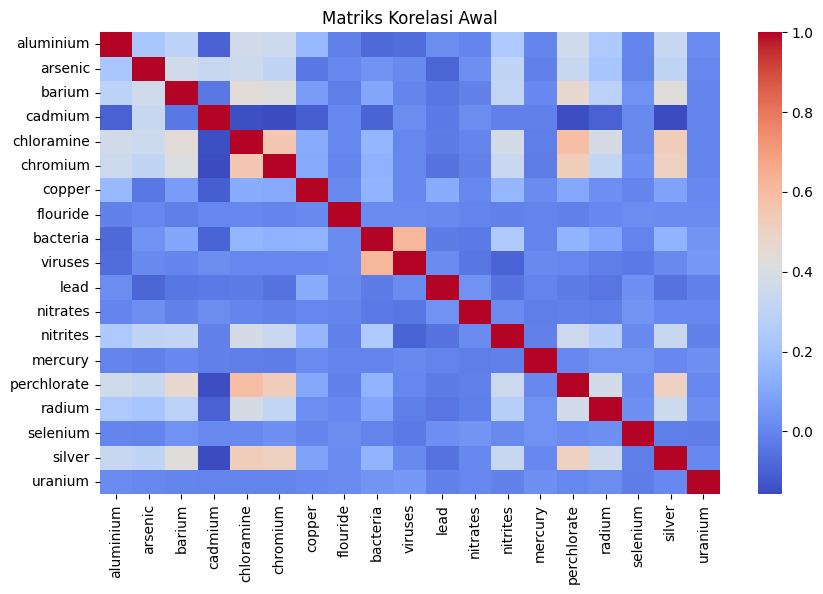

In [82]:
# Cek korelasi dan distribusi data
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Matriks Korelasi Awal")
plt.show()

In [83]:
# Cek jumlah missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [84]:
#  # 1. Menangani Missing Values dengan Median dan Convert ke numeric 
df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(df.median())

In [85]:
# 2. Menghapus Data Duplikat
df = df.drop_duplicates()
print(f"Data setelah tahap 1 & 2: {df.shape}")

Data setelah tahap 1 & 2: (7999, 21)


In [86]:
# 3. Deteksi dan Penanganan Outlier (IQR Capping)
for col in df.columns.drop('is_safe'):
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    df[col] = np.clip(df[col], Q1 - 1.5*IQR, Q3 + 1.5*IQR)
print("Outliers ditangani.")

Outliers ditangani.


In [87]:
# 4. Binning (Pengelompokan Data)
df['alum_level'] = pd.cut(df['aluminium'], bins=3, labels=['Low', 'Medium', 'High'])

In [88]:
# 5. Encoding Data Kategorikal
le = LabelEncoder()
df['alum_level'] = le.fit_transform(df['alum_level'])
print("Binning dan Encoding selesai.")

Binning dan Encoding selesai.


In [89]:
# 6. Normalisasi atau Standarisasi Fitur
scaler = StandardScaler()
features = df.columns.drop('is_safe')
df[features] = scaler.fit_transform(df[features])
print("Preprocessing Manual Selesai!")

Preprocessing Manual Selesai!


In [90]:
# 7. Tentukan direktori output (Sama dengan script automate)
output_dir = "waterquality_preprocessed"
os.makedirs(output_dir, exist_ok=True)

In [91]:
# 8. Buat nama file dengan timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
output_file = os.path.join(output_dir, f"Ewaterquality_eksperiment_preprocessed{timestamp}.csv")

In [92]:
# 9. Simpan ke CSV
df.to_csv(output_file, index=False)
print(f"Hasil eksperimen manual berhasil disimpan di: {output_file}")

Hasil eksperimen manual berhasil disimpan di: waterquality_preprocessed\Ewaterquality_eksperiment_preprocessed20251225_043533.csv
